In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [2]:
X, Y = make_blobs(n_samples=100, centers=2, n_features=2,\
random_state=70,cluster_std=1.7)

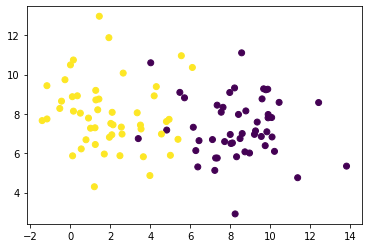

In [3]:
plt.scatter(X[:,0],X[:,1],c=Y)

In [4]:
def H(p,n):
    h=0
    if(p!=0 and n!=0):
        p1=p/(p+n)
        n1=n/(p+n)
        h= -(p1*np.log2(p1)+n1*np.log2(n1))
    elif(p!=0 and n==0):
        p1=p/(p+n)
        h= -(p1*np.log2(p1))
    elif(p==0 and n!=0):
        n1=n/(p+n)
        h= -(n1*np.log2(n1))
    return h

In [5]:
P = list(Y).count(0)
N = list(Y).count(1)

In [6]:
E = H(P,N)

In [7]:
IG_List1=[]
thr1=[]
IG_List2=[]
thr2=[]

In [8]:
for i in range(10):
    x1 = i+0.5
    pos_g = 0
    neg_g = 0
    pos_l = 0
    neg_l = 0
    for i in range (len(X[:,0])):
        if X[i,0]>x1 and Y[i]==1:
            pos_g +=1
    for i in range(len(X[:,0])):
        if X[i,0]>x1 and Y[i]==0:
            neg_g+=1 

    for i in range (len(X[:,0])):
        if X[i,0]<x1 and Y[i]==1:
            pos_l +=1
    for i in range(len(X[:,0])):
        if X[i,0]<x1 and Y[i]==0:
            neg_l+=1 
    # ig = E - (p_g+n_g)/(P+N) * H(p_g,n_g) - (p_l+n_l)/(P+N) * H(p_l,n_l)
    PplusN = pos_g+neg_g+pos_l+neg_l


    IG = E - ( (pos_g+neg_g)/(PplusN) * H(pos_g,neg_g) + (pos_l+neg_l)/(PplusN) * H(pos_l,neg_l))
    IG_List1.append(IG)
    thr1.append(x1)

index1 = IG_List1.index(max(IG_List1))

In [9]:
for i in range(10):
    x1 = i+0.5
    pos_g = 0
    neg_g = 0
    pos_l = 0
    neg_l = 0
    for i in range (len(X[:,1])):
        if X[i,1]>x1 and Y[i]==1:
            pos_g +=1
    for i in range(len(X[:,1])):
        if X[i,1]>x1 and Y[i]==0:
            neg_g+=1 

    for i in range (len(X[:,1])):
        if X[i,1]<x1 and Y[i]==1:
            pos_l +=1
    for i in range(len(X[:,1])):
        if X[i,1]<x1 and Y[i]==0:
            neg_l+=1 
    # ig = E - (p_g+n_g)/(P+N) * H(p_g,n_g) - (p_l+n_l)/(P+N) * H(p_l,n_l)
    PplusN = pos_g+neg_g+pos_l+neg_l


    IG = E - ( (pos_g+neg_g)/(PplusN) * H(pos_g,neg_g) + (pos_l+neg_l)/(PplusN) * H(pos_l,neg_l))
    IG_List2.append(IG)
    thr2.append(x1)

index2 = IG_List2.index(max(IG_List2))


5.5


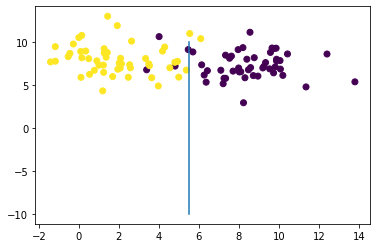

In [10]:
global flag,k
plt.scatter(X[:,0],X[:,1],c=Y)
if (max(IG_List2)>max(IG_List1)):
    y = np.linspace(-10,10,20)
    x = thr2[index2] * np.ones(20)
    print(thr2[index2])
    plt.plot(y,x)
    flag=1
    k = thr2[index2]
else:
    flag=0
    k = thr1[index1]
    y = np.linspace(-10,10,20)
    x = thr1[index1] * np.ones(20)
    print(thr1[index1])
    plt.plot(x,y)

In [11]:
def model(xn):
    if flag:
        B =xn[:,1]<k
    else :
        B = xn[:,0]<k
    return np.array(B)

xx shape  (141, 193)
(27213, 2)
(27213,)


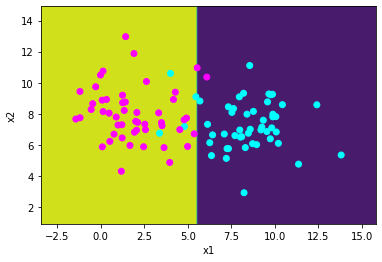

In [12]:
from numpy import reshape

x_min,x_max=X[:,0].min() -2,X[:,0].max()+2
y_min,y_max=X[:,1].min() -2,X[:,1].max()+2
h=0.1
xx,yy=np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))
print("xx shape ",xx.shape)
xn = (np.c_[xx.ravel(),yy.ravel()])
print(xn.shape)
p = model(xn)
pp = reshape(p,xx.shape)
print(p.shape)
pp = pp.reshape(xx.shape)
plt.contourf(xx, yy, pp, cmap="viridis")
plt.ylabel('x2')
plt.xlabel('x1')
plt.scatter(X[:,0], X[:,1], c=Y, cmap="cool")